In [53]:
#Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [54]:
df = pd.read_csv('SampleSuperstore.csv')  #reading the data set
df.head()   #display first 5 rows

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [55]:
df.tail() #displays the last 5 rows

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [56]:
df.shape #display the number of rows and number of columns

(9994, 13)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [58]:
#display the data types
df.dtypes


Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [59]:
df.describe() #describes statistical information about the dataset

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Data Cleaning

In [60]:
df.isnull().sum()  #checking for null values

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [61]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [62]:
#finds the duplicate data
df.duplicated().sum()

17

In [63]:
#remove the duplicate data

df.drop_duplicates(inplace=True)

In [64]:
df.duplicated().sum()

0

# Data Visualization

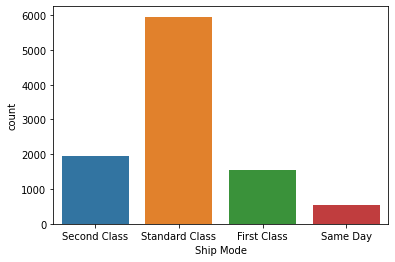

In [65]:
#visualizing the variables 
sns.countplot(x="Ship Mode",data=df)
plt.show()

Standard Class has the highest shipping mode.

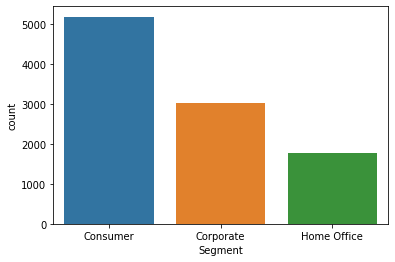

In [66]:
#visualizing the varaibale
sns.countplot(x="Segment",data=df)
plt.show()

Consumer segment has the largest count.

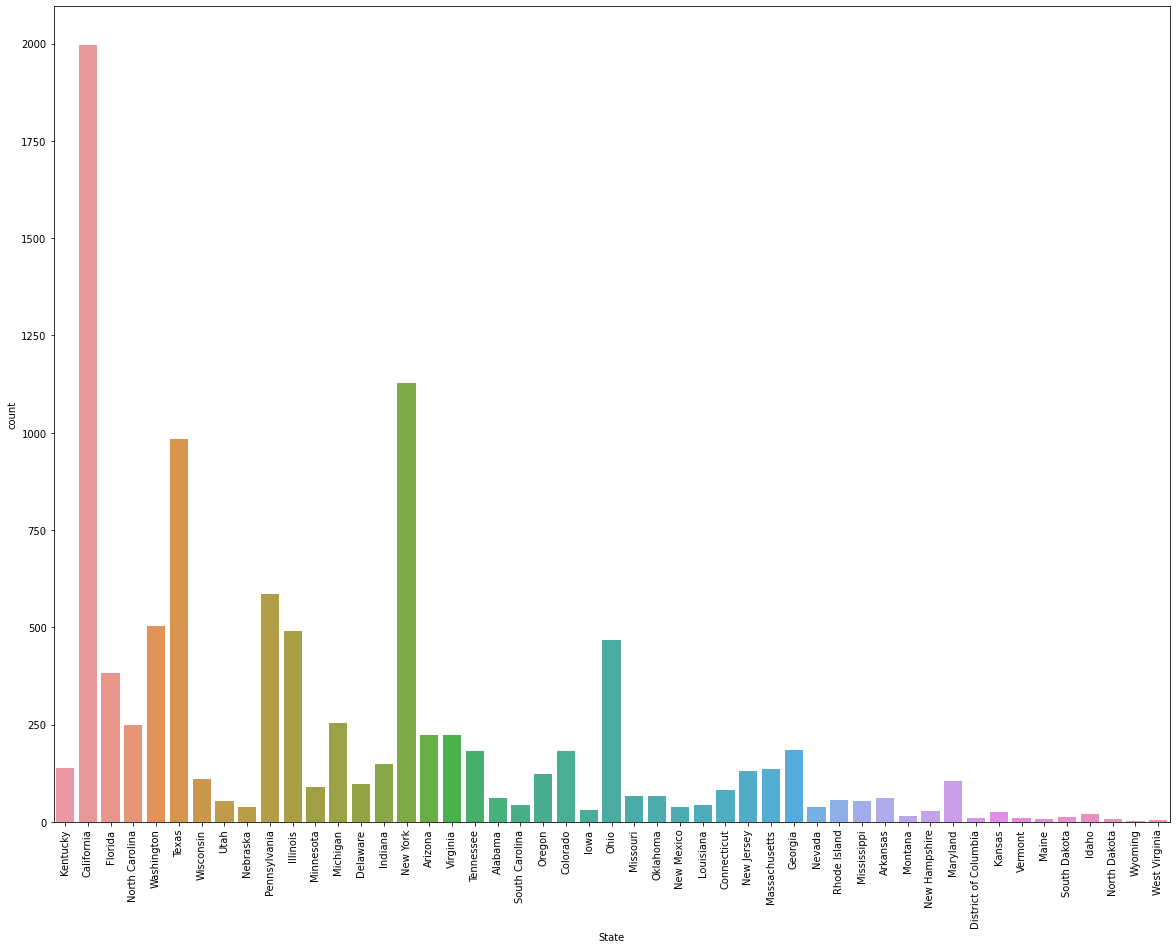

In [67]:
#visualizing the varaibale
plt.figure(figsize=(20,15))
sns.countplot(x="State",data=df)
plt.xticks(rotation=90)
plt.show()

States like California,Texas,New York are the most active.
States like West Virginia,Wyoming,North Dakota etc. are least active in business.

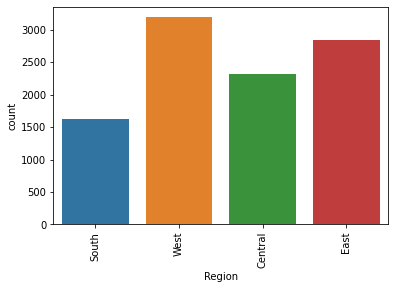

In [68]:
#visualizing the varaibale
sns.countplot(x="Region",data=df)
plt.xticks(rotation=90)
plt.show()

West Region is the highest contributing region to the business followed by East.South is the least contributing region to the business.

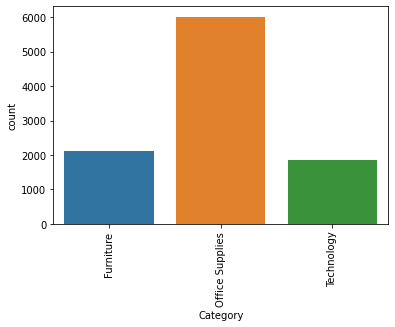

In [69]:
#visualizing the varaibale
sns.countplot(x="Category",data=df)
plt.xticks(rotation=90)
plt.show()

Office Supplies is the most contributing category to the business.

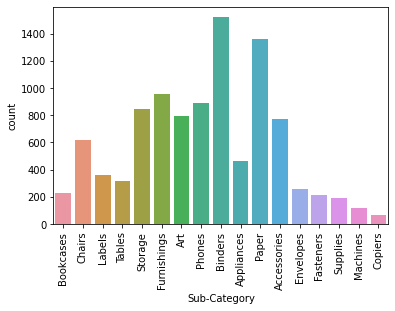

In [70]:
#visualizing the varaibale
sns.countplot(x="Sub-Category",data=df)
plt.xticks(rotation=90)
plt.show()

Binders are the highest in the sub-category.

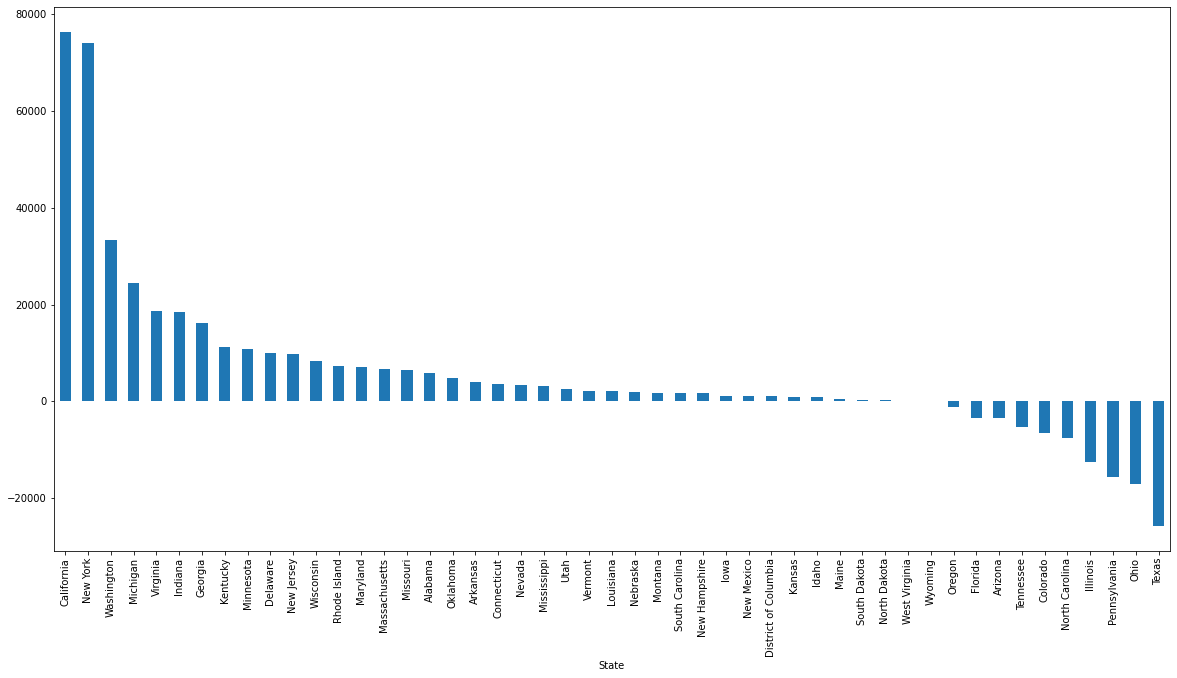

In [71]:
#Checking on the state variable with the profit
plt.figure(figsize=(20,10))
df_group=df.groupby(["State"])["Profit"].sum()
df_group.sort_values(ascending=False,inplace=True)
df_group.plot.bar()
plt.show()

The state  California has the highest profit.
The states like New York , Washington etc shown good profit.
On the other hand few states like Texas , Ohio has the reverse impact on the profit though the paticipation was more in these states still the states has shown loss than profit.

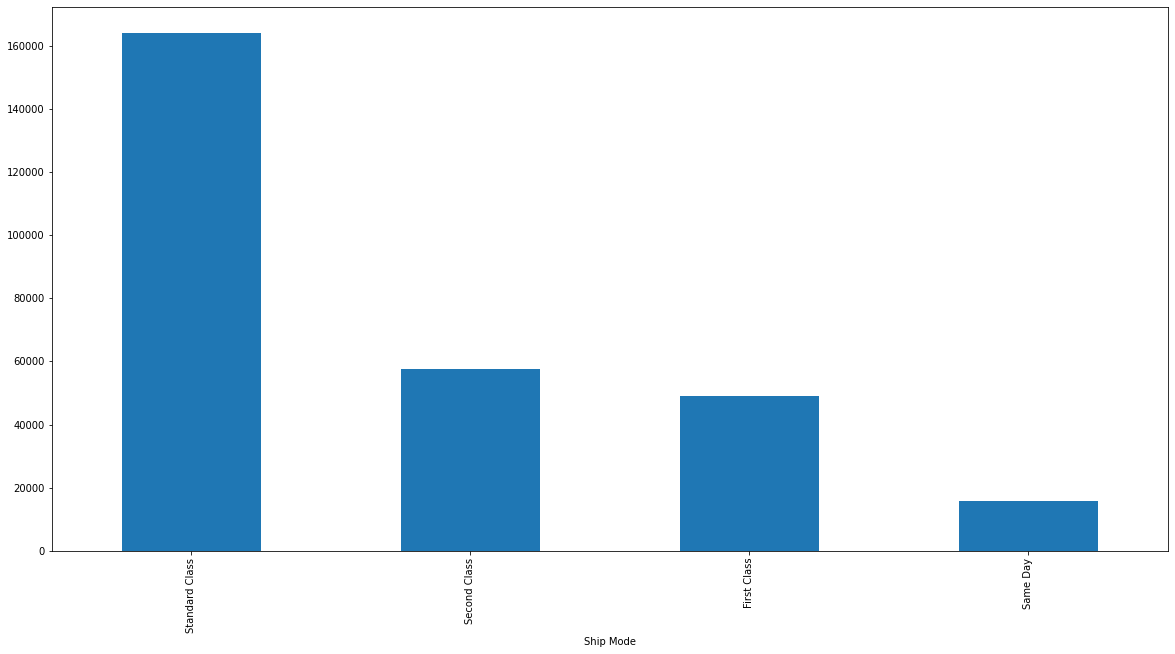

In [72]:
#Checking on the Shipmode variable with the profit
plt.figure(figsize=(20,10))
df_group_city=df.groupby(["Ship Mode"])["Profit"].sum()
df_group_city.sort_values(ascending=False,inplace=True)
df_group_city.plot.bar()
plt.show()

The Standard Class is a shipping mode making more profit among all the other mode

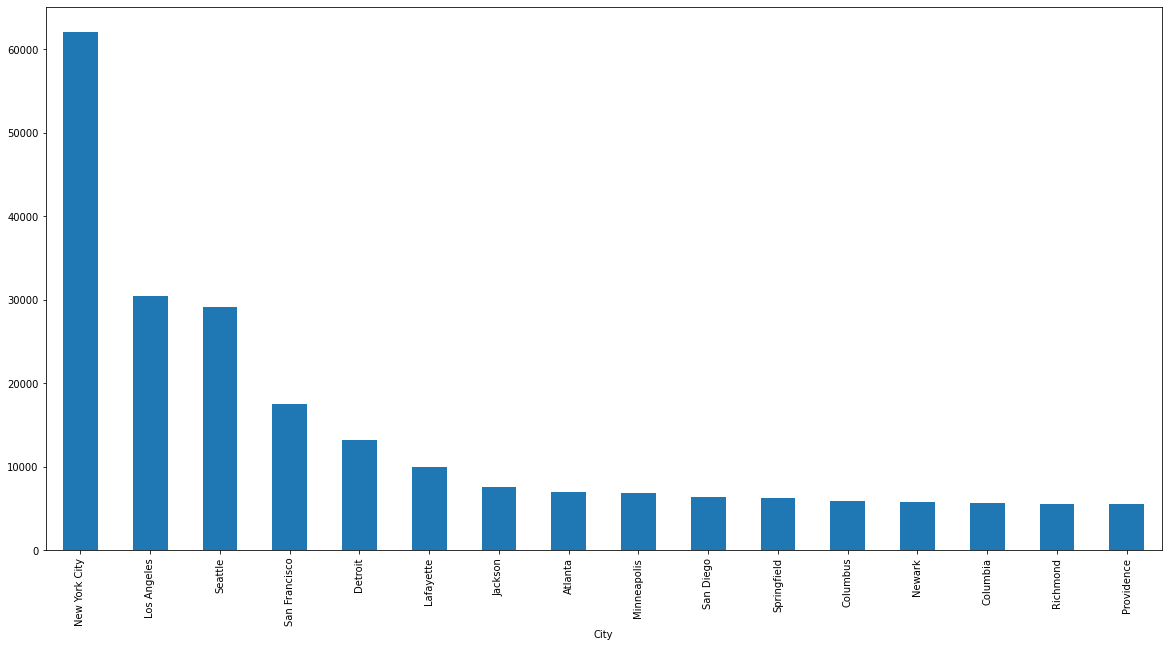

In [73]:
#Checking on the city  variable with the profit
plt.figure(figsize=(20,10))
df1=df.groupby(["City"])["Profit"].sum()
df2=df1[df1>5000]
df2.sort_values(ascending=False,inplace=True)
df2.plot.bar()
plt.show()

The most profit making cities are New York City , Los Angeles and Seattle.

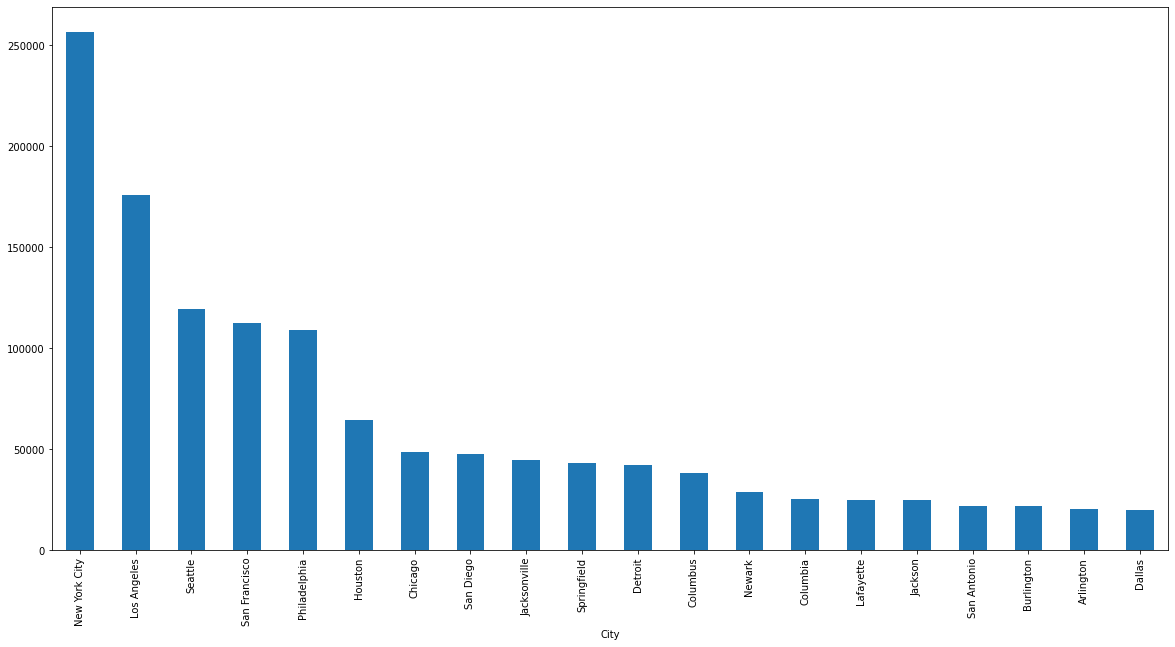

In [74]:
#Checking on the city  variable with the sales
plt.figure(figsize=(20,10))
df3=df.groupby(["City"])["Sales"].sum()
df4=df3[df3>20000]
df4.sort_values(ascending=False,inplace=True)
df4.plot.bar()
plt.show()

New York City , Los Angeles and Seattle have the highest sales as well as profit.

C:\Users\Pragya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales', ylabel='Profit'>

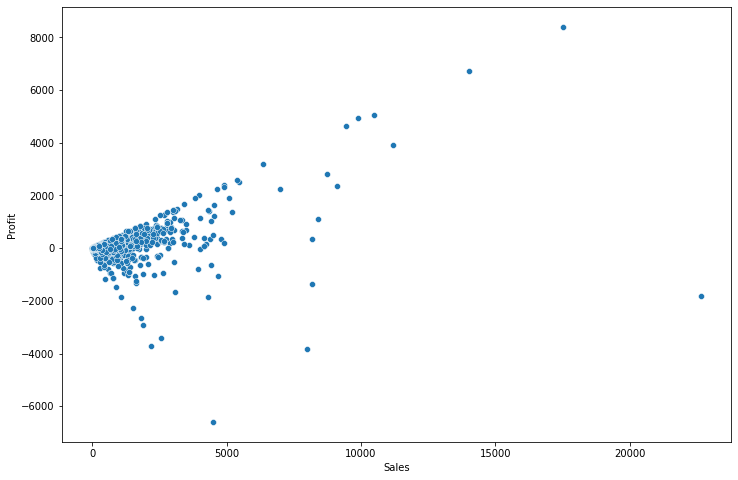

In [75]:
#the relation between the two variable profit and sales 
plt.figure(figsize=(12,8))
sns.scatterplot(df['Sales'],df['Profit'])

We observe that the increase in the sales dosn't have much impact on the profit
At certain point the increase in sales have good impact on making the profit but after that when the sale is higher not much helping to earn profit.

C:\Users\Pragya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


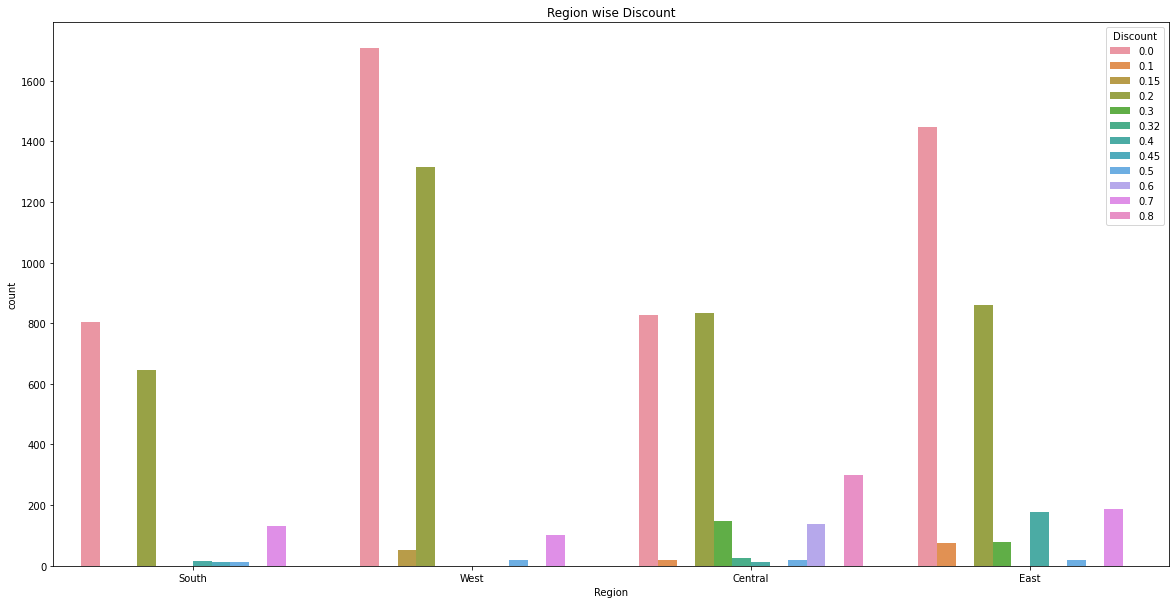

In [76]:
#visualizing the discounts in the region
plt.figure(figsize=(20,10))
sns.countplot("Region",data=df,hue="Discount")
plt.title("Region wise Discount")
plt.show()

The west region gives more discount as compared to the other regions ie the discount of 80%.
The second highest is the east region in providing the discounts.
The more the discount in the region the higher the sales and the better the profit of that region.

C:\Users\Pragya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


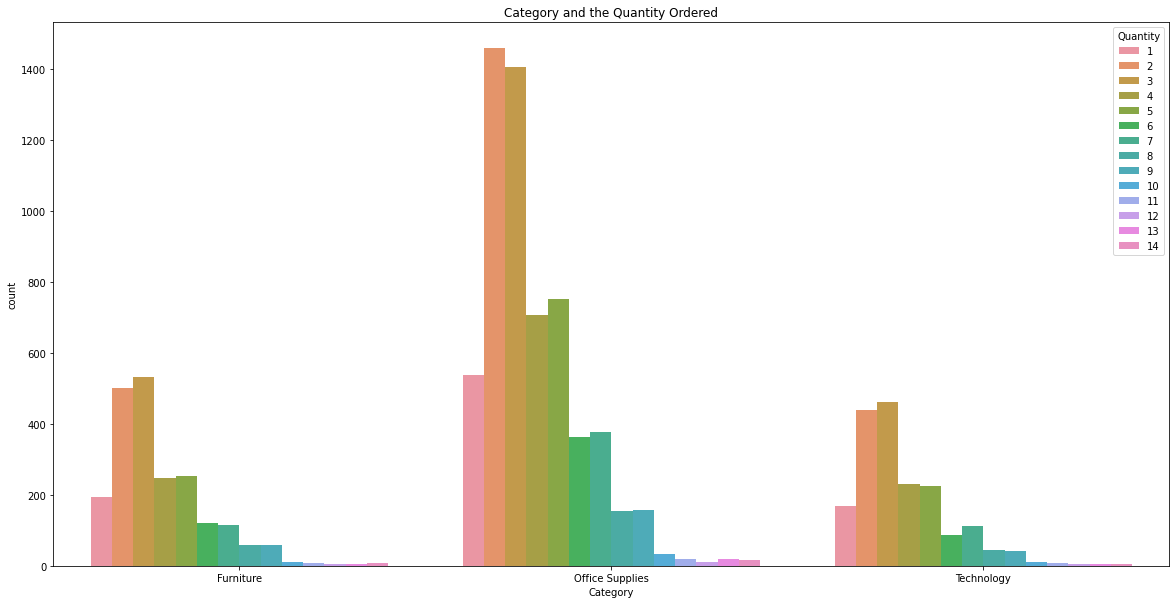

In [77]:
#visualizing region and the quantity ordered from that region
plt.figure(figsize=(20,10))
sns.countplot("Category",data=df,hue="Quantity")
plt.title("Category and the Quantity Ordered")
plt.show()

In the office supplies the sub category highly in demand is the Binders.
The paper also is one of the highest in demand sub category
We can say that most of the good profit is made by the supplies provided to the office as these supplies are high in demand and thus business is making good profit from it

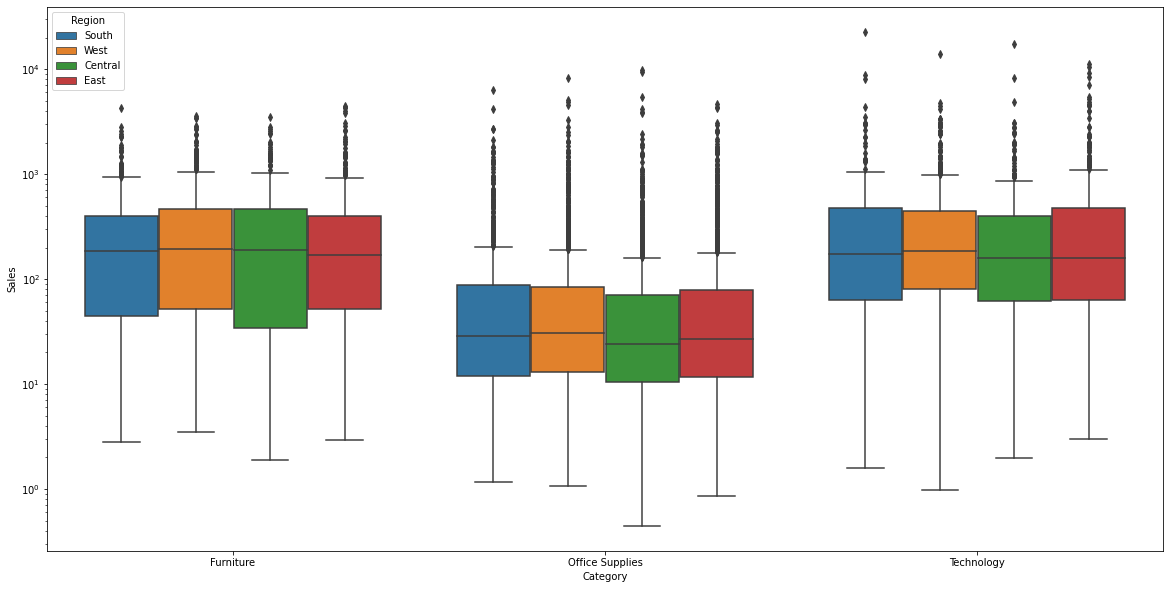

In [78]:
#visualizing the category variable with the sales and region 
plt.figure(figsize = (20, 10))
ax=sns.boxplot(x = 'Category', y = 'Sales', hue = 'Region', data = df)
ax.set_yscale('log')
plt.show()

The furniture have a good business in the western region and so is the technology.
The office supply in the east is not much as the furniture in the east.
The technology makes good profit in the south region.

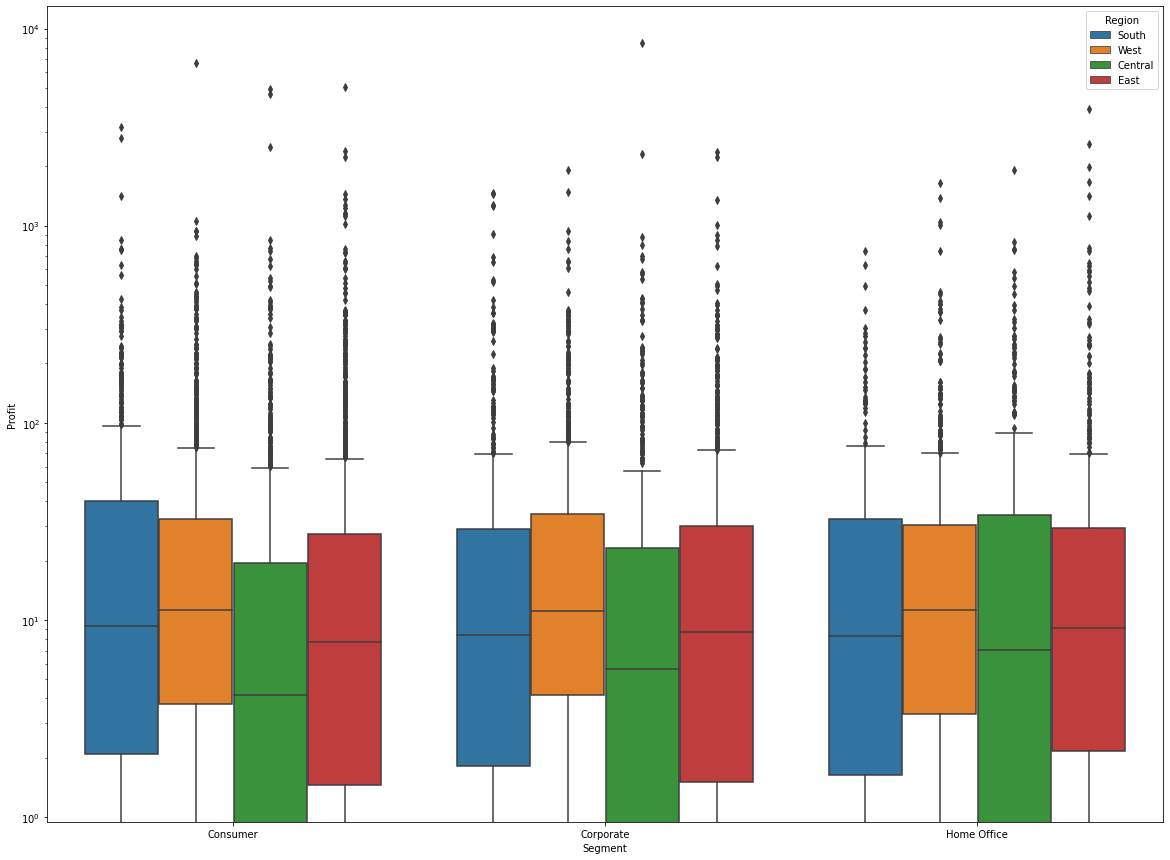

In [79]:
#visualizing the segment and the profit in the region 
plt.figure(figsize = (20, 15))
ax=sns.boxplot(x = 'Segment', y = 'Profit', hue = 'Region', data = df)
ax.set_yscale('log')
plt.show()

The corporate segment is making good profit in the west region at the same time it has loss in the central region.
The consumer segment in the south region shows the good profit in the business.
All the segments in the central region should be taken care as losses are also observed.

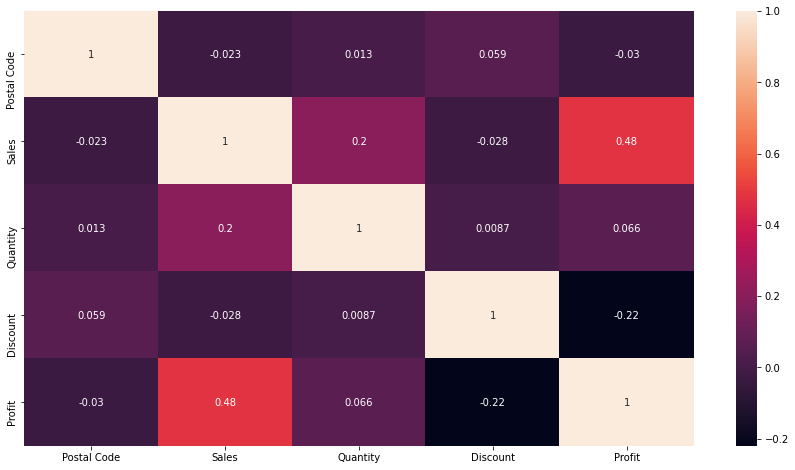

In [80]:
#heatmap to check the correlation of the dataset
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

The correlation between Profit and sales do exist . When there is a sale there is a profit observed in the business.
When the sales starts the quantity of the prodcut also increases as the price decreases.
The discount is not much affecting the profit hence this feature should be taken care . May be the good discount may benifit the business.
The focus on the central region should be more as more loss are observed there .
The discount is inversely proportional to the sales which has to be taken care .
Some of the segment like consumer and home office shows loss which need to be improved by looking at the other feature like sales and discount in that area.